In [14]:
import tensorflow
from tensorflow import keras

In [15]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [16]:
l,r,c = x_train.shape
print(l,r,c)

60000 28 28


In [17]:
y_train.shape

(60000,)

In [18]:
x_train_flat = x_train.reshape(l,r*c)
print("x_train_flat:", x_train_flat.shape)

x_train_flat: (60000, 784)


In [19]:
l,r,c = x_test.shape
x_test_flat = x_test.reshape(l,r*c)
print("x_test_flat:",x_test_flat.shape)

x_test_flat: (10000, 784)


In [20]:
x_train_flat = x_train_flat/255
x_test_flat = x_test_flat/255

In [23]:
model= keras.Sequential()
model.add(keras.layers.Dense(784,input_shape=(784, ),activation = "relu"))
model.add(keras.layers.Dense(10, activation = "sigmoid"))

model.compile(
optimizer = "adam",
loss = "sparse_categorical_crossentropy",
metrics = ["accuracy"])
model.fit(x_train_flat,y_train,epochs = 5)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1911 - accuracy: 0.9432
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0747 - accuracy: 0.9768
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0493 - accuracy: 0.9843
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0335 - accuracy: 0.9895
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0259 - accuracy: 0.9917
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params:

In [24]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0680 - accuracy: 0.9808


[0.06802307814359665, 0.9807999730110168]

In [25]:
import numpy as np

In [26]:
[np.argmax(arr) for arr in model.predict(x_test_flat[:10])]

1/1 [==============================] - 0s 84ms/step


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [27]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [28]:
import tensorflow as tf

cm = tf.math.confusion_matrix(labels = y_test, predictions = [np.argmax(arr) for arr in model.predict(x_test_flat)])
cm

313/313 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    0,    1,    1,    2,    1,    2,    0],
       [   1, 1129,    2,    1,    0,    1,    1,    0,    0,    0],
       [   1,    1, 1015,    2,    1,    1,    2,    4,    4,    1],
       [   0,    0,    5,  986,    0,    5,    0,    3,    3,    8],
       [   1,    2,    5,    0,  960,    0,    2,    4,    1,    7],
       [   3,    1,    0,   10,    1,  862,    8,    0,    5,    2],
       [   2,    3,    0,    1,    3,    1,  946,    0,    2,    0],
       [   1,    7,    4,    2,    0,    0,    0, 1001,    2,   11],
       [   3,    0,    6,    3,    1,    1,    5,    2,  950,    3],
       [   0,    8,    0,    2,    7,    2,    0,    3,    0,  987]])>

Text(95.72222222222221, 0.5, 'expected')

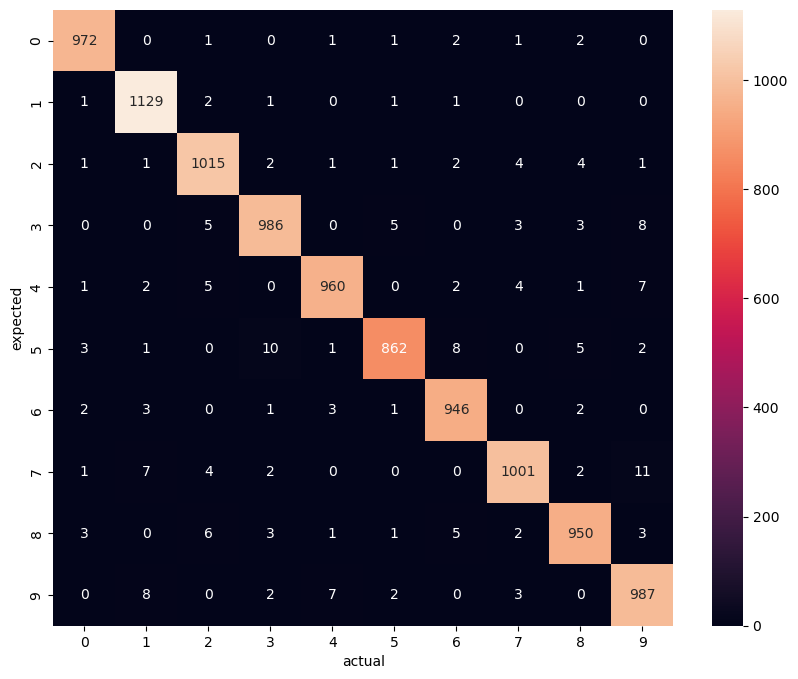

In [30]:
import seaborn as sb
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
sb.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("actual")
plt.ylabel("expected")